<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Digital Futures Linear Regression Challenge

- This challenge will consist of a set of exercises related to Linear Regression
- Please use the statsmodel package instead of scikit-learn for this challenge book
- You will have 1 hour to finish, save and upload your workbook to learn.digitalfutures.com, so you should keep an eye on time and make sure you will be able to do this
- To complete the exercises, please download the additional files into the same directory as your workbook

## 1.) Package and data frame imports

#### 1.1 Import your usual packages for data manipulation, visualisation, regression modeling (remember to use statsmodels!) and model evaluation here.

In [4]:
import numpy as np # these are ll the packages I will need/expect to need
import pandas as pd #data
import matplotlib.pyplot as plt #visualisations
import seaborn as sns #visualisations
from sklearn.model_selection import train_test_split #splitting fct
import statsmodels.api as sm #includes the model I'll need
import statsmodels.tools # 
from sklearn.preprocessing import MinMaxScaler # not strictly for the task but in case I have time to optimise 

#### 1.2 Import the USA_housing.csv file as a data frame and check the first few rows.

In [6]:
df = pd.read_csv("USA_Housing.csv")

In [7]:
df.head() # top 5 rows 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## 2.) EDA

#### 2.1 Check the data for null values.

In [10]:
df.isnull().sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Address                      0
dtype: int64

In [11]:
# no nulls present 

#### 2.2 Check summary stastics of numerical feature variables.

In [13]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,69621.713378,2.469066e+06


#### 2.3 Visualise the relationship between all numerical features using a pairplot.

In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
num_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price']

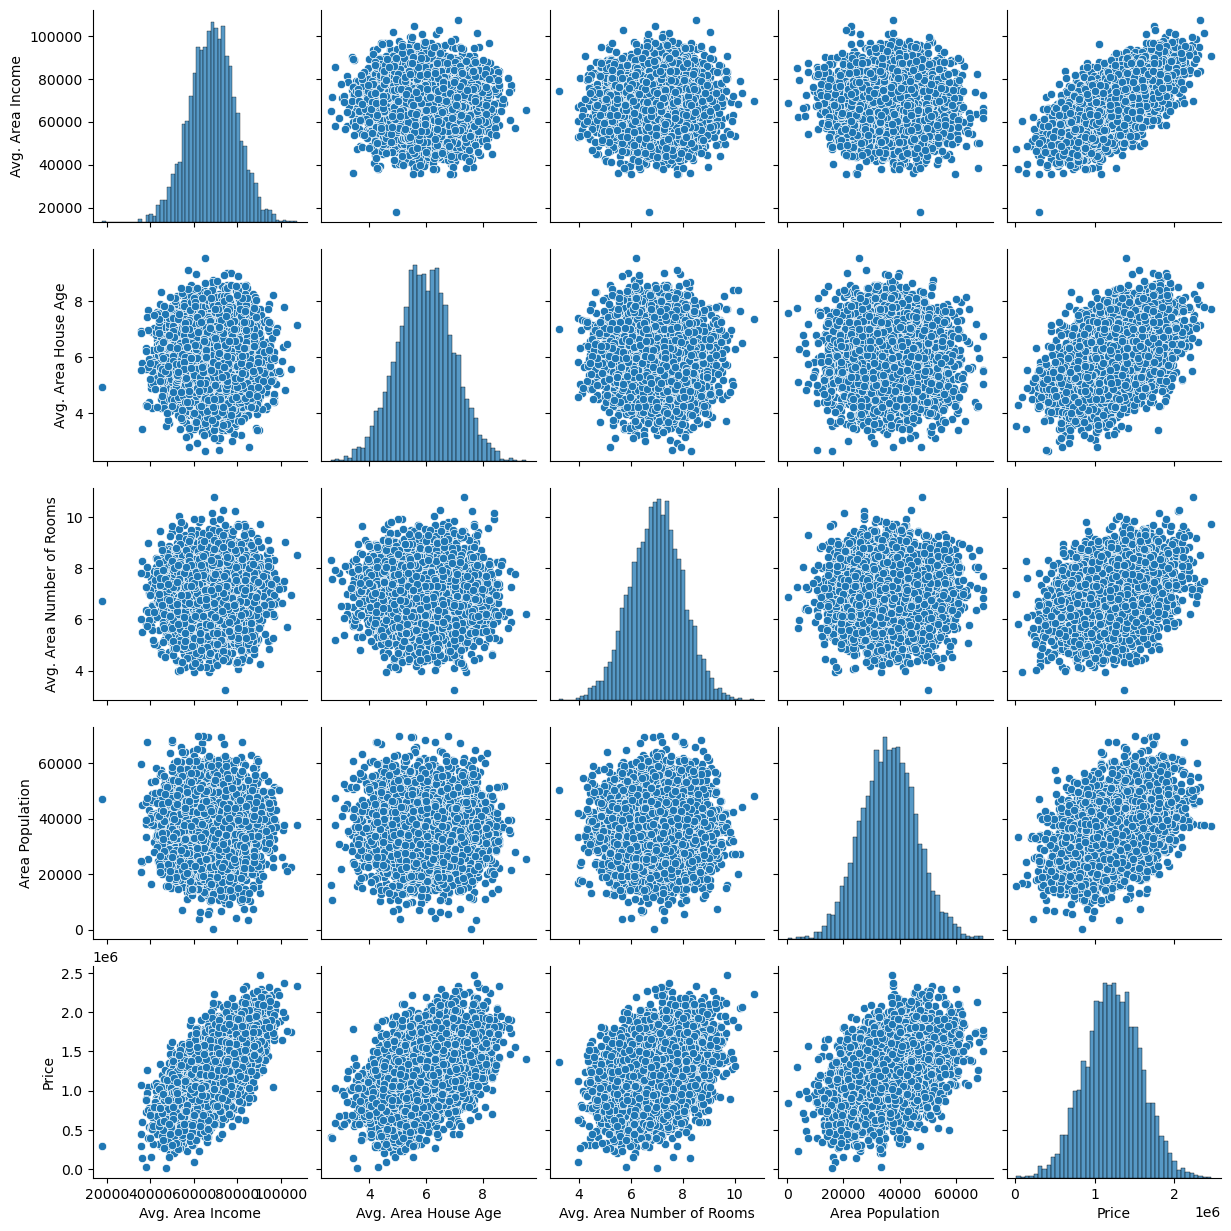

In [17]:
sns.pairplot(df[num_cols])
plt.show()

#### 2.4 Create a heatmap of the correalations between features.

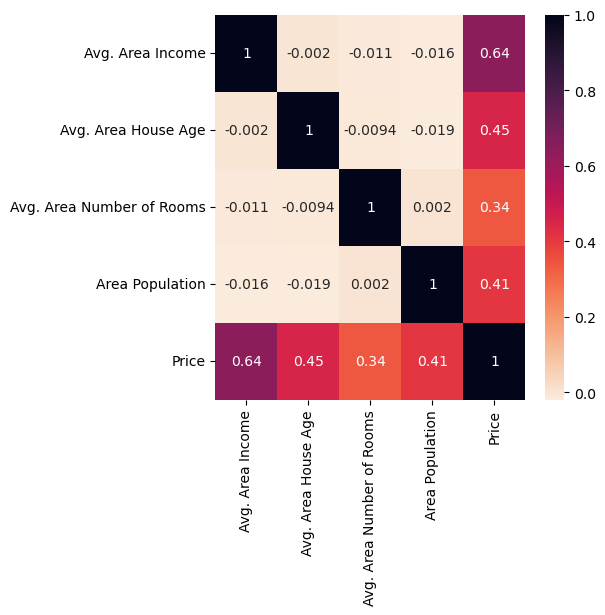

In [19]:
plt.figure(figsize = (5, 5))
sns.heatmap(df[num_cols].corr(), 
            annot = True,
            cmap = 'rocket_r') #dark = correlation

plt.show()

#### 2.5 Create a frequency distributions plot for the Price and Income columns.

<Figure size 500x500 with 0 Axes>

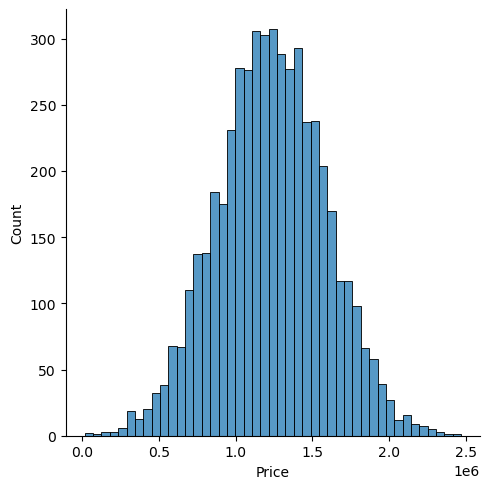

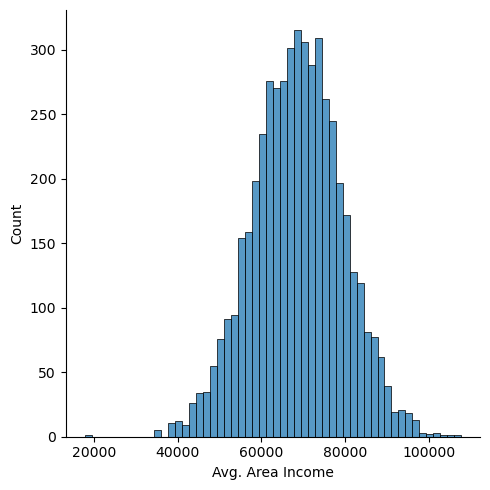

In [21]:
plt.figure(figsize = (5, 5)) #two histograms
sns.displot( data = df['Price'])
sns.displot( data = df['Avg. Area Income'])
plt.show()

## 3.) Modeling

#### 3.1 Your task is to fit a model to Price. First, create a  train-test-split with the test-size being 20% and random state being 42.

In [24]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
fe_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population']
X=df[fe_cols] #features
y=df['Price'] #target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) #splitting with 80:20 train:test ratio

In [27]:
X_train.head() # check to see if it has worked smoothly

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4227,66547.016454,5.846095,6.847298,27850.822901
4676,53722.008599,6.401391,7.787764,47649.224665
800,64838.492899,6.437157,8.699544,32921.010068
3671,67097.092120,6.086754,7.211963,27191.506877
4193,75245.465436,8.167820,7.420100,37410.669928


#### 3.2 Create and fit the linear regression model (again, remember to use statsmodel!).

In [29]:
def fe_fct(df): # short function to apply to X)_train (and later the X_test)
    df=df.copy()
    df=sm.add_constant(df) # adds constant for the stats models OLS model to add a coefficient to.
    return df

In [30]:
X_train_fe = fe_fct(X_train) # adds constant column
lin_reg = sm.OLS(y_train,X_train_fe) # finding a model to connect the two 
results = lin_reg.fit() #fitting the model to the data and labeling it 'results'

#### 3.2 Create a model summary.

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        16:03:44   Log-Likelihood:                -51779.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3995   BIC:                         1.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.636e+06   1.92e+04   -137.281      0.000   -2.67e+06    -2.6e+06
Avg. Area Income             21.6598      0.150    144.594      0.000      21.366      21.953
Avg. Area House Age        1.647e+05   1613.817    102.058      0.000    1.62e+05    1.68e+05
Avg. Area Number of Rooms   1.21e+05   1588.452     76.177      0.000    1.18e+05    1.24e+05
Area Population              15.2655      0.161     94.914      0.000      14.950      15.581
==============================================================================
Omnibus:                        4.731   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.217
Skew:                          -0.012   Prob(JB):                        0.121
Kurtosis:                       2.843   Cond. No.                     9.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.) Predictions

#### 4.1 Create a variable holding your y_test predictions.

In [35]:
X_test_fe = fe_fct(X_test)

In [36]:
y_test_pred = results.predict(X_test_fe) #using the 'results' model from a bove to predict y values from the X_test

#### 4.2 Return the evaluation metrics: RMSE, MAE, MSE.

In [72]:
#comparing the difference between the actual y_test and the predicted y_pred using various sm tools

rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
mae_test = statsmodels.tools.eval_measures.meanabs(y_test, y_test_pred)
mse_test = statsmodels.tools.eval_measures.mse(y_test, y_test_pred)

print(rmse_test)
print(mae_test)
print(mse_test)

100367.93130214633
80857.78944045857
10073721633.872366
